In [101]:
# import all necessary python libraries
import pandas as pd
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import numpy as np
import math
import seaborn as sn
import matplotlib.pyplot as plt
% inline matplotlib

UsageError: Line magic function `%` not found.


# Gathering

# 

In [102]:
# Load twitter-archive into a dataframe
twitter_archives = pd.read_csv('twitter-archive-enhanced.csv')

In [103]:
# verify if image_prediction folder exists if folder doesn't exist create folder
folder_name  = "image_prediction_csv"
if not  os.path.exists(folder_name):
    os.makedirs(folder_name)

In [104]:
# create list object and add url, incase another similar dataset is added in the future 
urls = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv']

In [105]:
# Access each url and download  its content using the request library and store each downloaded file in the image_prediction folder we created earlier
# Before storing the file using the python string split function to split the url and save the file using the last 
for url in urls:
    response = requests.get(url)
    with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)

In [106]:
# load image prediction.tsv file into our dataframe
image_prediction = pd.read_csv(folder_name+'\image-predictions.tsv', sep='\t')

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

### The code below is not necessary functionality for the project but rather serves for converting a .txt file to a .json file format.

In [107]:
# Convert the text file extension to json file extension
# To accomplish this, do the following
# 1 Verify if the file with the json extension already exists if not convert the txt file to json extension
# Though the conversion is not really important because the code will work the same with .txt extension 
file_name = 'tweet-json.json'
current_dir = os.getcwd()
# inserting a backslash ('\') directly into the code will serve as an escape character,
#so i use the ascii code for backslah instead to solve this problem
delimiter = chr(92)
current = current_dir + delimiter + file_name
if os.path.exists(r"{}".format(current)):
    os.rename(file_name, 'tweet-json.txt')

In [108]:
# load the json file and read it line by line to access its content, extract tweet_id, retweets_counts, favorite_counts
tweet_list = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        tweet_list.append({
            'tweet_id':data['id'],
            'retweet_counts':data['retweet_count'],
            'favorite_counts':data['favorite_count']
        })

In [109]:
# create a dataframe using the tweet_list with pandas DataFrame method
tweets_counts = pd.DataFrame(tweet_list, columns=['tweet_id', 'retweet_counts', 'favorite_counts'])

# Assessing Data

#  

In [110]:
# Load twitter_archive dataframe
twitter_archives

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [111]:
# Use the value_count method to get count for each value occurence in the timestamp column.
twitter_archives.timestamp.value_counts()

2017-08-01 16:23:56 +0000    1
2016-01-13 02:43:46 +0000    1
2016-01-15 02:41:12 +0000    1
2016-01-15 02:08:05 +0000    1
2016-01-15 01:25:33 +0000    1
                            ..
2016-09-11 21:34:30 +0000    1
2016-09-10 23:54:11 +0000    1
2016-09-10 16:03:16 +0000    1
2016-09-09 18:31:54 +0000    1
2015-11-15 22:32:08 +0000    1
Name: timestamp, Length: 2356, dtype: int64

In [112]:
# Get all data frame with name equal to 'a' for all dogs
twitter_archives[twitter_archives['name']== 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [113]:
# All score with numerator over 20
twitter_archives[twitter_archives['rating_numerator'] >20 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [114]:
# All score with denominator less than 10
twitter_archives[twitter_archives['rating_denominator'] < 10 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [115]:
# get details about twitter_archive df such all columns data type
twitter_archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [116]:
# use pandas describe to get data statistics
twitter_archives.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [117]:
# Verify if any tweet_id were duplicated
twitter_archives.tweet_id.value_counts()

892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
775085132600442880    1
774757898236878852    1
774639387460112384    1
774314403806253056    1
666020888022790149    1
Name: tweet_id, Length: 2356, dtype: int64

In [118]:
# Number of retweeted tweets
twitter_archives[twitter_archives['retweeted_status_id'].notnull()].retweeted_status_id.count()

181

In [119]:
twitter_archives['in_reply_to_status_id'].notnull().value_counts()

False    2278
True       78
Name: in_reply_to_status_id, dtype: int64

In [120]:
image_prediction.sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1295,751937170840121344,https://pbs.twimg.com/media/Cm9q2d3XEAAqO2m.jpg,1,Lakeland_terrier,0.424168,True,teddy,0.260562,False,golden_retriever,0.127432,True
163,668960084974809088,https://pbs.twimg.com/media/CUifpn4WUAAS5X3.jpg,1,shower_curtain,0.226309,False,Chesapeake_Bay_retriever,0.165878,True,bathtub,0.056726,False
1545,792050063153438720,https://pbs.twimg.com/media/Cv3tU38WcAASFas.jpg,2,komondor,0.942856,True,swab,0.052715,False,Tibetan_terrier,0.002743,True
200,669680153564442624,https://pbs.twimg.com/media/CUsuijgXAAE4pdi.jpg,1,dalmatian,0.141257,True,borzoi,0.137744,True,Labrador_retriever,0.103792,True
372,672984142909456390,https://pbs.twimg.com/media/CVbrcZyVAAA5Wpq.jpg,1,wombat,0.738780,False,beaver,0.133368,False,wallaby,0.032370,False
1157,733482008106668032,https://pbs.twimg.com/media/Ci3Z_idUkAA8RUh.jpg,1,French_bulldog,0.619382,True,computer_keyboard,0.142274,False,mouse,0.058505,False
1319,756275833623502848,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,1,Airedale,0.602957,True,Irish_terrier,0.086981,True,bloodhound,0.086276,True
1456,777641927919427584,https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg,1,golden_retriever,0.964929,True,Labrador_retriever,0.011584,True,refrigerator,0.007499,False
1103,721503162398597120,https://pbs.twimg.com/media/CgNLS1PW8AAxWSN.jpg,3,Pomeranian,0.997750,True,Chihuahua,0.001248,True,Pekinese,0.000775,True
404,673705679337693185,https://pbs.twimg.com/media/CVl7u00WcAAufzR.jpg,1,Shih-Tzu,0.165383,True,Lhasa,0.116977,True,Yorkshire_terrier,0.063899,True


In [121]:
image_prediction.jpg_url.duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

In [122]:
image_prediction[image_prediction.jpg_url== 'https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
800,691416866452082688,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True
1624,803692223237865472,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True


In [123]:
# Number of duplicated jpg_url
image_prediction.jpg_url.duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

In [124]:
# verify if any p1_conf is greater 1
image_prediction.p1_conf.sort_values()

38      0.044333
136     0.055379
1093    0.059033
1370    0.063152
246     0.070076
          ...   
1372    0.999953
149     0.999956
1229    0.999962
1299    0.999984
106     1.000000
Name: p1_conf, Length: 2075, dtype: float64

In [125]:
# verify if any p2_conf is greater 1
image_prediction.p2_conf.sort_values()

106     1.011300e-08
1299    1.002880e-05
1229    1.448950e-05
230     1.763430e-05
1372    2.335910e-05
            ...     
72      4.549370e-01
232     4.605650e-01
1514    4.648160e-01
1756    4.676780e-01
986     4.880140e-01
Name: p2_conf, Length: 2075, dtype: float64

In [126]:
# Any duplicated tweet_id
image_prediction[image_prediction['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [127]:
# use .info method to get  dataframe details
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [128]:
tweets_counts[tweets_counts['tweet_id'] == 666063827256086533]

,tweet_id,retweet_counts,favorite_counts
2343,666063827256086533,232,496


In [129]:
tweets_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_counts   2354 non-null   int64
 2   favorite_counts  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [130]:
#  Verify id any tweet_id is duplicated
tweets_counts.tweet_id.duplicated().value_counts()

False    2354
Name: tweet_id, dtype: int64

In [131]:
tweets_counts.tweet_id.sort_values()

2353    666020888022790149
2352    666029285002620928
2351    666033412701032449
2350    666044226329800704
2349    666049248165822465
               ...        
4       891327558926688256
3       891689557279858688
2       891815181378084864
1       892177421306343426
0       892420643555336193
Name: tweet_id, Length: 2354, dtype: int64

## Data Quality Issues

## twitter_archives

### 1. Links in 'source' column are embedded in anchors tags.
### 2. The following columns have missing data: in_reply_status_id, in_reply_to_user_id, retweeted_status_id,                   retweetd_status_user_id, retweeted_status_timestamp, expanded_url(can't clean yet).
### 3.  Invalid name 'a' for dog with several occurences (can't fix for now).
### 4. Denominator rating greater and less than 10 in some data occurences.
### 5. Wrong data type and  +0000 unnecessarily added at the end of the date for timestamp column.
### 6.  None and nan represented as Nulls.
### 7. 181 retweeted.
### 8.  numerators that are greater than 20.
### 9. Drop rows whose 'expanded_url' does not include 'dog_rates' .




## Image_prediction

### 10. 66 rows are duplicates in the jpg_url column.



## Data Tidiness 

### twitter_archives

### 1. The columns floofer, pupper, doggo and pupo should be joinned into a single column.
### 2.  retweet_count and favorite_count belong to the twitter_archive table.

# 

# Cleaning Data

# 

### Make copy of each table

In [294]:
twitter_archives_clean = twitter_archives.copy()
image_prediction_clean = image_prediction.copy()
tweets_counts_clean = tweets_counts.copy()

# Tidiness

# 

## 1. The columns floofer, pupper, doggo and pupo should be joinned into a single      column           called dog_stage.

## Define

### Replace all None values  in th the four columns with empty strings, create a new column called dog_stage, concantenate the four values from the four columns into the dog_stage column. finally drop the floor four columns.

## Code

In [295]:
# replace_to_Nan funtion takes in a list of columns and a dataframe to replace all None values in the df with empty string.
def replace_to_emptyString(list_name, dataframe):
    for l_name in list_name:
        dataframe[l_name] = dataframe[l_name].apply(lambda x: str(x).replace('None', '').strip())

replace_nan_list = ['doggo', 'floofer', 'pupper', 'puppo']        
replace_to_emptyString(replace_nan_list, twitter_archives_clean)

# Concatenate all values from ffour columns into the dog_stage column
twitter_archives_clean['dog_stage'] = twitter_archives_clean['doggo']+twitter_archives_clean['floofer']+twitter_archives_clean['pupper']+twitter_archives_clean['puppo']
#Strip to get rid of any white spaces around value
twitter_archives_clean['dog_stage'] = twitter_archives_clean['dog_stage'].apply(lambda x: str(x).strip())
# drop all columns in the list
twitter_archives_clean.drop(columns=replace_nan_list, inplace=True)
# Replace all empty strings with NaNs
twitter_archives_clean['dog_stage'] = twitter_archives_clean['dog_stage'].replace(r'^\s*$', np.nan, regex=True)

# Test

In [296]:
# Use the value_count method to get count of each value
twitter_archives_clean.dog_stage.value_counts()

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

## 2. Retweet_count and favorite_count belong to the twitter_archive table.

# Define

## Merge the twitter_archive df to the tweets_counts_clean df on the tweet_id

# Code

In [297]:
# user pandas merge function to merge twitter_archives_clean to tweets_counts_clean on tweet_id
twitter_archives_clean = pd.merge(twitter_archives_clean, tweets_counts_clean, on=['tweet_id'], how='left')

# Test

In [298]:
twitter_archives_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_counts,favorite_counts
1235,712668654853337088,NaN,NaN,2016-03-23 15:53:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sunny and Roxy. They pull things ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712668654...,10,10,Sunny,NaN,1367.0,4531.0
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,NaN,2454.0,6138.0
443,819347104292290561,NaN,NaN,2017-01-12 00:55:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Anna and Elsa. They fall asleep i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819347104...,12,10,Anna,NaN,1383.0,8008.0
2132,670079681849372674,NaN,NaN,2015-11-27 03:20:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fabio. He's a wonderful pup. Can't stay a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670079681...,10,10,Fabio,NaN,1373.0,2390.0
266,841833993020538882,NaN,NaN,2017-03-15 02:10:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Ken. His cheeks are mag...,8.174239e+17,4.196984e+09,2017-01-06 17:33:29 +0000,https://twitter.com/dog_rates/status/817423860...,13,10,Ken,NaN,17504.0,0.0
961,751132876104687617,NaN,NaN,2016-07-07 19:16:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,puppo,1480.0,5610.0
855,764857477905154048,NaN,NaN,2016-08-14 16:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aubie. He has paws for days. Nibbling ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/764857477...,12,10,Aubie,NaN,2029.0,7099.0
2057,671355857343524864,NaN,NaN,2015-11-30 15:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lou. He's a Petrarch Sunni Pinto. Well...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671355857...,10,10,Lou,NaN,119.0,508.0
1257,710296729921429505,NaN,NaN,2016-03-17 02:48:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oshie. 12/10 please enjoy (vid by @cat...,NaN,NaN,NaN,https://vine.co/v/iw9hUFAMerV,12,10,Oshie,NaN,833.0,2574.0
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Vine will be deeply missed. This was by far my...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14,10,None,NaN,21156.0,37818.0


# Quality



# twitter_archives_clean



## 1. Links in 'source' column are embedded in anchors tags

## Define



### Remove anchor tags in source column.



# Code

In [299]:
# use pandas extract with regular expression to extract only the url
twitter_archives_clean['source'] = twitter_archives_clean.source.str.extract('(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)', expand=True)

# Test

In [300]:
twitter_archives_clean['source'].value_counts()

http://twitter.com/download/iphone              2221
http://vine.co                                    91
http://twitter.com                                33
https://about.twitter.com/products/tweetdeck      11
Name: source, dtype: int64

## 5. Wrong data type and  +0000 unnecessarily added at the end of the date for timestamp column.


## Define
### Use replace to replace +0000 with empty strings

## Code

In [301]:
# Use replace method to replace all ' +0000' with ''
twitter_archives_clean['timestamp'] = twitter_archives_clean['timestamp'].apply(lambda x: str(x).replace(' +0000', ''))
# convert to datetime object
twitter_archives_clean.timestamp = pd.to_datetime(twitter_archives_clean.timestamp)

# Test

In [302]:
twitter_archives_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_counts,favorite_counts
1379,701545186879471618,NaN,NaN,2016-02-21 23:13:01,http://twitter.com/download/iphone,Meet Millie. She's practicing her dive form fo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701545186...,10,10,Millie,pupper,680.0,2902.0
951,751950017322246144,NaN,NaN,2016-07-10 01:23:49,http://vine.co,This is Lola. She's a surfing pupper. 13/10 ma...,NaN,NaN,NaN,https://vine.co/v/5WrjaYAMvMO,13,10,Lola,pupper,1060.0,3415.0
717,783695101801398276,NaN,NaN,2016-10-05 15:47:27,http://twitter.com/download/iphone,This is Loomis. He's the leader of the Kenneth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783695101...,12,10,Loomis,NaN,3737.0,11650.0
637,793286476301799424,NaN,NaN,2016-11-01 03:00:09,http://twitter.com/download/iphone,This is Moreton. He's the Good Boy Who Lived. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,NaN,10723.0,27597.0
829,768909767477751808,NaN,NaN,2016-08-25 20:35:48,http://twitter.com/download/iphone,RT @dog_rates: When it's Janet from accounting...,7.001438e+17,4.196984e+09,2016-02-18 02:24:13 +0000,https://twitter.com/dog_rates/status/700143752...,10,10,None,pupper,3129.0,0.0


## 4. Denominator rating greater and less than 10 in some data occurences.

## Define
### Set any rating_denominator whose value is less than or greater than 10

## Code

# Test

In [303]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

In [304]:
# Set all rating_denominators to 10
twitter_archives_clean['rating_denominator'] = 10

# Test

In [305]:
twitter_archives_clean.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

## 6. None and nan represented as Nulls.

## Define 

### Convert all None  and nan to NaNs


## Code

In [306]:
# Replace all None values with NaN
twitter_archives_clean = twitter_archives_clean.replace(r'None', np.nan, regex=True)
# Replace all nan with NaN
#twitter_archives_clean = twitter_archives_clean.replace('nan', np.nan, regex=True)

In [307]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2354 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

## 7. 181 retweeted.
## Define

### Delete all retweeted tweets.


## Code

In [308]:
# Get all indices values and past it as a list to be deleted to the drop method
retweets = twitter_archives_clean[twitter_archives_clean['retweeted_status_id'].notnull()].index.values.astype(int)
twitter_archives_clean.drop(retweets, axis=0, inplace=True)

# Test

In [309]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2175 non-null   datetime64[ns]
 4   source                      2175 non-null   object        
 5   text                        2173 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2117 non-null   object        
 10  rating_numerator            2175 non-null   int64         
 11  rating_denominator          2175 non-null   int64       

## 8. numerators that are greater than 20

## Define
### Get the median of all numerator_ratings less than 20 and replace all numerator_rating greater than 20 with the median.


## Code

In [310]:
# Get median for all numerators less than 20 and set all numerators greater than 20 to median
median_numerator = twitter_archives_clean[twitter_archives_clean['rating_numerator'] < 20].rating_numerator.median()
twitter_archives_clean['rating_numerator'] = twitter_archives_clean['rating_numerator'].apply(lambda x: median_numerator if x > 20 else x)

# Test

In [311]:
twitter_archives_clean['rating_numerator'].max()

20.0

## 9. Drop rows whose 'expanded_url' does not include 'dog_rates' .

## Define
### Create a temporal column to hold type of column(ie dog_rates or not). Then delete all rows that are not dog_rates and finally drop 'tweet_type' column.

## Code

In [312]:
# split expanded_urls to get values after the https 
twitter_archives_clean['tweet_type'] = twitter_archives_clean['expanded_urls'].apply(lambda x: str(x).split('//')[-1].split('status')[0].split('twitter.com')[-1].replace('/','').strip())
# Load a dataframe of values that are not dog_rates
x = twitter_archives_clean[twitter_archives_clean['tweet_type'] != 'dog_rates']
# select all values that are not nan and store thier indexes
indexes = x[x['tweet_type'] != 'nan'].index.values
# Drop all indexes in twitter_archives_cleab
twitter_archives_clean.drop(indexes, axis=0, inplace=True)
# drop tweet_type column
twitter_archives_clean.drop(['tweet_type'], axis=1, inplace=True)

# Test

In [313]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2052 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2052 non-null   datetime64[ns]
 4   source                      2052 non-null   object        
 5   text                        2050 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               1994 non-null   object        
 10  rating_numerator            2052 non-null   float64       
 11  rating_denominator          2052 non-null   int64       

## Image_prediction

### 10. 66 rows are duplicates in the jpg_url column.

## Define
### Delete all duplicated rows for jpg_url


## Code

In [314]:
image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='first', inplace=True )

## Test

In [315]:
image_prediction_clean.jpg_url.duplicated().value_counts()

False    2009
Name: jpg_url, dtype: int64

# Storing Data

In [330]:
# Store cleaned files with appropriate names for future use
# Merge twitter_arhives_clean to image_prediction_clean
tweet_predictions = pd.merge(archive, predictions, on=['tweet_id'], how='left')
tweet_predictions.to_csv('twitter_archive_master.csv', index=False)

# Analyzing and Visualizing Data

In [318]:
# Remove retweeted tweets that reappeared from the prediction df
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
# Drop any retweets occurences
retweets = twitter_archive_master[twitter_archive_master['retweeted_status_id'].notnull()].index.values
twitter_archive_master.drop(retweets, axis=0, inplace=True)

In [319]:
#Load our dataframes
archive = pd.read_csv('twitter_archive_master.csv')
predictions = pd.read_csv('image_prediction_master.csv')

In [320]:
archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [321]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [322]:
# Merge both dataframes 
tweet_predictions = pd.merge(archive, predictions, on=['tweet_id'], how='left')

In [323]:
# see new dataframe details
tweet_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2173 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      float64
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   float64
 11  rating_denominator          2175 non-null   int64  
 12  name                        1495 non-null   object 
 13  dog_stage                   344 n

In [324]:
# Verify if all retweets were deleted
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2173 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      float64
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   float64
 11  rating_denominator          2175 non-null   int64  
 12  name                        1495 non-null   object 
 13  dog_stage                   344 n

In [325]:
# Get data summary
twitter_archive_master.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,retweet_counts,favorite_counts,img_num,p1_conf,p2_conf,p3_conf
count,2.175000e+03,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2175.000000,2175.0,2175.000000,2175.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,7.371205e+17,7.455079e+17,2.014171e+16,NaN,NaN,NaN,10.617471,10.0,2757.987126,8746.022989,1.203109,0.593941,1.344195e-01,6.024848e-02
std,6.748668e+16,7.582492e+16,1.252797e+17,NaN,NaN,NaN,2.214128,0.0,4646.599662,12052.503836,0.560777,0.271954,1.006807e-01,5.089067e-02
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,NaN,0.000000,10.0,0.000000,52.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.768432e+17,6.757419e+17,3.086374e+08,NaN,NaN,NaN,10.000000,10.0,608.000000,1911.500000,1.000000,0.362857,5.393987e-02,1.619283e-02
50%,7.098528e+17,7.038708e+17,4.196984e+09,NaN,NaN,NaN,11.000000,10.0,1341.000000,4042.000000,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,7.894226e+17,8.257804e+17,4.196984e+09,NaN,NaN,NaN,12.000000,10.0,3220.000000,11107.000000,1.000000,0.846285,1.951377e-01,9.159438e-02
max,8.924206e+17,8.862664e+17,8.405479e+17,NaN,NaN,NaN,20.000000,10.0,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


# Insights

## 1.

### The average Dog rating on @weratedogs is 13.21/10

## 2.

In [326]:
# Group tweets by dog_stage and get count of each stage
values  = twitter_archive_master.groupby(['dog_stage']).dog_stage.count()

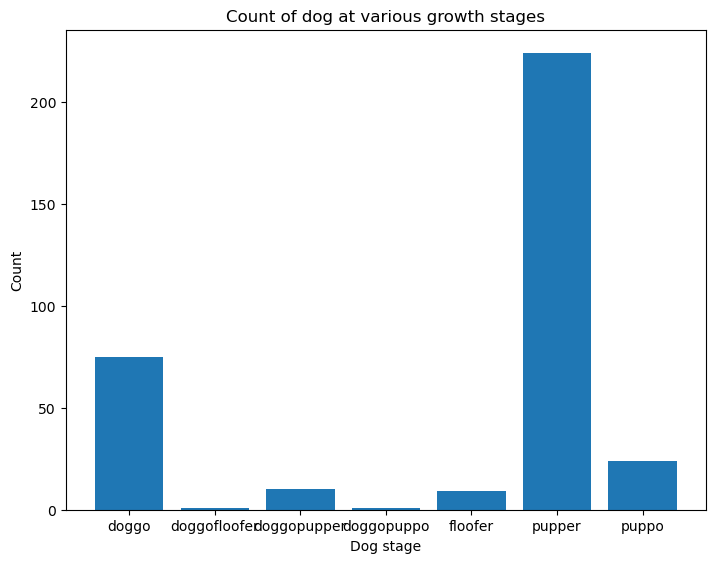

In [327]:
# plot the results obtained above
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['doggo', 'doggofloofer', 'doggopupper', 'doggopuppo', 'floofer', 'pupper', 'puppo']
values = list(values)
ax.bar(labels, values)
plt.xlabel('Dog stage')
plt.ylabel('Count')
plt.title('Count of dog at various growth stages')
plt.show()

## The Pupper (224 counts)stage seems to be the dog_stage with the highest number of dogs. second by the doggo stage with 75 counts

## 3.

In [328]:
# get row with highest number of favorite counts
highest_favorite = twitter_archive_master[twitter_archive_master['favorite_counts'] == twitter_archive_master.favorite_counts.max()]
highest_favorite

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
348,822872901745569793,NaN,NaN,2017-01-21 18:26:02,http://twitter.com/download/iphone,Here's a super supportive puppo participating ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822872901...,...,1.0,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True


In [329]:
highest_favorite.value_counts()

Series([], dtype: int64)

## The tweet with the highest number of favorite counts was done on the 2017-01-21